In [ ]:
# ---- Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# --- Load csv file and read the data ---
df = pd.read_csv('insurance.csv')
df.head() # first 5 records

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# --- check duplicate value
df.duplicated().sum()

np.int64(1)

In [ ]:
#remove duplicate value
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum().any()

np.False_

In [ ]:
# - Seperate the target ----
X = df.drop('charges', axis=1)
y = df['charges']

In [ ]:
# check the columns in the dataset
print(X.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [ ]:
# --- seperate the categorical columns and numerical columns for further process ---
categorical = ['sex', 'smoker', 'region']
numerical = ['age', 'bmi', 'children']

In [ ]:
# Preprocessing columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)
    ])

In [ ]:
#Splitting thr data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
# Preproceesing the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
#Baseline ANN Model
model_base = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

In [ ]:
# compiling the model
model_base.compile(loss='mse',optimizer='adam',metrics =['r2_score'])

In [ ]:
#traing
history_base = model_base.fit(X_train, y_train, validation_data =(X_test,y_test),epochs=50, batch_size=32, verbose=1)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 334964928.0000 - r2_score: -1.3059 - val_loss: 318490592.0000 - val_r2_score: -1.1559
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 319330176.0000 - r2_score: -1.1774 - val_loss: 318478912.0000 - val_r2_score: -1.1558
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 323295520.0000 - r2_score: -1.2210 - val_loss: 318465024.0000 - val_r2_score: -1.1557
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 309958368.0000 - r2_score: -1.2864 - val_loss: 318448160.0000 - val_r2_score: -1.1556
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 338195520.0000 - r2_score: -1.1942 - val_loss: 318427808.0000 - val_r2_score: -1.1555
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 300840320.0000 - r2_score: -1.2159 - val_loss: 318403488.0000 - val_r2_score: -1.1553
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 297641600.0000 - r2_score: -1.2100 - val_loss: 318375296.0000 - val_r2_score:

In [ ]:
#Model evaluation
loss_base = model_base.evaluate(X_test, y_test)
print(f'Loss (MSE): {loss_base[0]}')
print(f'R2 Score: {loss_base[1]}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 316736512.0000 - r2_score: -1.1732 
Loss (MSE): 314086688.0
R2 Score: -1.1260666847229004


In [ ]:
# Optimized ANN Model
from tensorflow.keras.layers import Dropout

# Optimized model with Dropouts
model_opt = Sequential([
    Dense(128, input_dim = X_train.shape[1], activation = 'relu'),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.1),
    Dense(1)
])


In [ ]:
#Compiling the model
model_opt.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                  loss='mse', metrics=['r2_score'])

In [ ]:
# --- early stopping ---
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# --- fitting the model ---
history_opt = model_opt.fit(X_train, y_train, validation_data=(X_test, y_test),
                             epochs=100, batch_size=32, callbacks=[early_stopping],verbose =1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 337582016.0000 - r2_score: -1.1799 - val_loss: 318375648.0000 - val_r2_score: -1.1551
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 341613184.0000 - r2_score: -1.2335 - val_loss: 317225536.0000 - val_r2_score: -1.1473
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 309890464.0000 - r2_score: -1.2468 - val_loss: 311015968.0000 - val_r2_score: -1.1053
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 302512896.0000 - r2_score: -1.1480 - val_loss: 290374336.0000 - val_r2_score: -0.9656
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 264289984.0000 - r2_score: -0.9273 - val_loss: 243720336.0000 - val_r2_score: -0.6498
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 227933792.0000 - r2_score: -0.5507 - val_loss: 178622016.0000 - val_r2_score: -0.2091
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 182761008.0000 - r2_score: -0.1407 - val_loss: 136850736.0000 - val_r2

In [ ]:
#Evaluating the model
train_loss_opt,train_r2_opt = model_opt.evaluate(X_train, y_train)
print(f'Loss (MSE): {train_loss_opt}')
print(f'R2 Score: {train_r2_opt}')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21093618.0000 - r2_score: 0.8419 
Loss (MSE): 22427116.0
R2 Score: 0.8466430902481079


In [ ]:
#Evaluating the model
test_loss_opt,test_r2_opt = model_opt.evaluate(X_test, y_test)
print(f'Loss (MSE): {test_loss_opt}')
print(f'R2 Score: {test_r2_opt}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26041090.0000 - r2_score: 0.8208 
Loss (MSE): 28246842.0
R2 Score: 0.8087958693504333


In [ ]:
'''
Comments ->
(1) Both training and testing R2 Score are within 5% of each other
(2) Both training and testing loss are above 0.78

Hence, we can say that the model looks optimal.
'''

'\nComments ->\n(1) Both training and testing R2 Score are within 5% of each other\n(2) Both training and testing loss are above 0.78\n\nHence, we can say that the model looks optimal.\n'

Text(0, 0.5, 'Validation Loss')

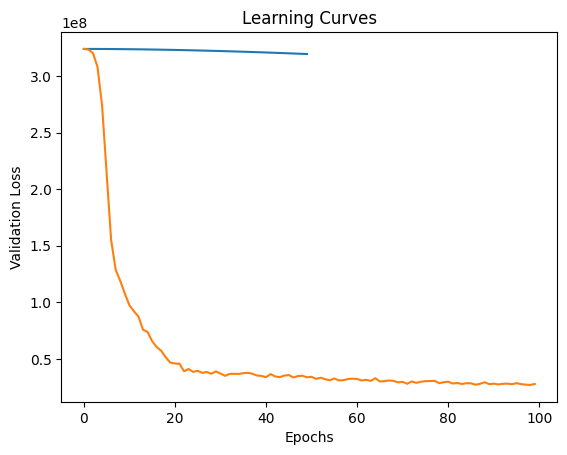

In [ ]:
# compare learning curve
plt.plot(history_base.history['loss'], label='Base Model')
plt.plot(history_opt.history['loss'], label='Optimized Model')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

In [ ]:
# Predictions
#Example from test set
sample=X_test[0].reshape(1,-1)
predicted_charge = model_opt.predict(sample)
print(f'Predicted Charge: {predicted_charge}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted Charge: [[10311.862]]


In [ ]:
# custom Input example
custom_data = pd.DataFrame({
    'age': [35],
    'sex': ['male'],
    'bmi': [20],
    'children': [2],
    'smoker': ['no'],
    'region': ['southeast']
})
custom_processed = preprocessor.transform(custom_data)
predicted_charge = model_opt.predict(custom_processed)
print(f'Predicted Charge: {predicted_charge}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Charge: [[6506.4873]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


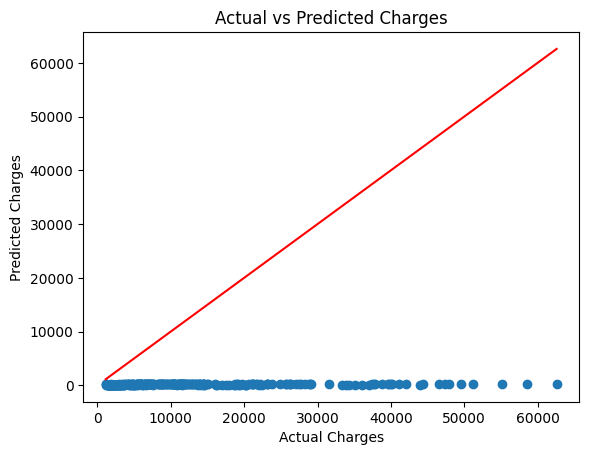

In [ ]:
# Actual vs Prediction
y_pred = model_base.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


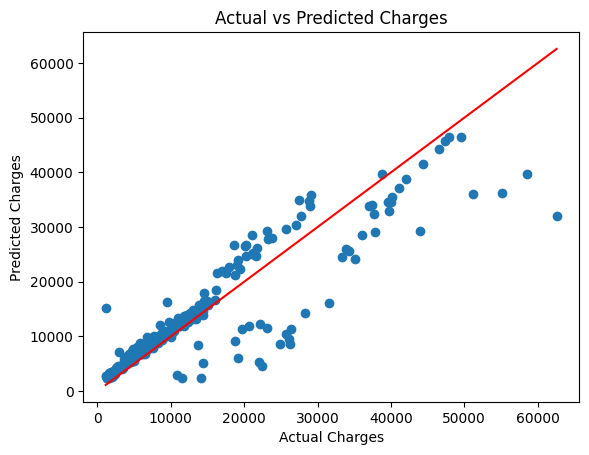

In [ ]:
# Actual vs Predicted Plot
y_pred = model_opt.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.show()


In [ ]:
# Saving the model in pickle file format
import pickle
with open('dl_reg_model.pkl', 'wb') as file:
    pickle.dump(history_opt, file)